In [9]:
# ==============================
# PROBLEM 1a
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Housing.csv")

# Select features for Problem 1a
features_1a = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X = df[features_1a].values.astype(float)
y = df["price"].values.astype(float)

# Simple rescaling of features (to keep stability for lr 0.1–0.01)
X = X / np.max(X, axis=0)   # divide each column by its max
y = y / np.max(y)           # scale target too (unitless)

# Train-test split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add bias column
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train_b = add_bias(X_train)
X_val_b = add_bias(X_val)

print("Train shape:", X_train_b.shape, "Val shape:", X_val_b.shape)


Train shape: (436, 6) Val shape: (109, 6)


In [10]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.05, n_iter=1000):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []

    for i in range(n_iter):
        # Predictions
        y_pred = X_train @ theta
        error = y_pred - y_train

        # Gradient
        grad = (2/m) * (X_train.T @ error)

        # Update rule
        theta -= lr * grad

        # Losses (MSE)
        train_loss = np.mean((X_train @ theta - y_train) ** 2)
        val_loss = np.mean((X_val @ theta - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


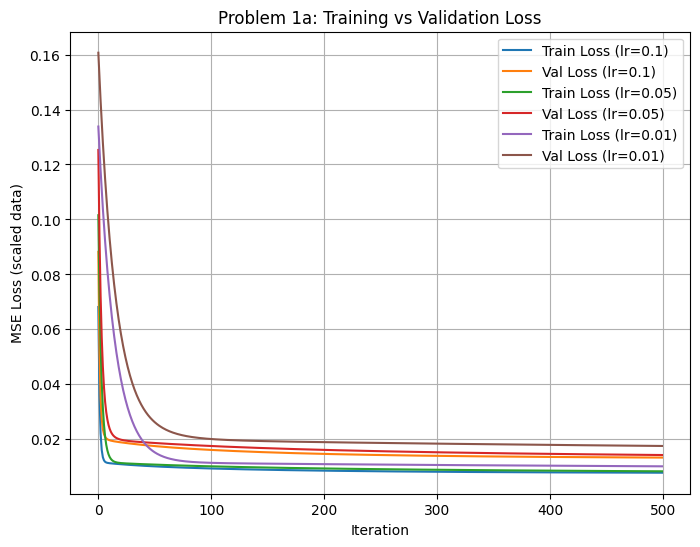

In [11]:
results = {}
for lr in [0.1, 0.05, 0.01]:
    theta, train_losses, val_losses = gradient_descent(
        X_train_b, y_train, X_val_b, y_val, lr=lr, n_iter=500
    )
    results[lr] = (theta, train_losses, val_losses)

# Plot losses
plt.figure(figsize=(8,6))
for lr, (theta, train_losses, val_losses) in results.items():
    plt.plot(train_losses, label=f"Train Loss (lr={lr})")
    plt.plot(val_losses, label=f"Val Loss (lr={lr})")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss (scaled data)")
plt.title("Problem 1a: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
for lr, (theta, train_losses, val_losses) in results.items():
    print(f"Learning rate = {lr}")
    print("Final Parameters (theta):", theta)
    print("Final Training Loss:", train_losses[-1])
    print("Final Validation Loss:", val_losses[-1])
    print("="*60)


Learning rate = 0.1
Final Parameters (theta): [0.0326241  0.31120668 0.09546    0.267044   0.15649566 0.09365872]
Final Training Loss: 0.0078098799026666155
Final Validation Loss: 0.013320299759043227
Learning rate = 0.05
Final Parameters (theta): [0.07332941 0.23494917 0.10192486 0.19878425 0.15416406 0.11031986]
Final Training Loss: 0.008329873010174856
Final Validation Loss: 0.014254640948310544
Learning rate = 0.01
Final Parameters (theta): [0.16295531 0.11443908 0.10429431 0.10210673 0.11869094 0.0950033 ]
Final Training Loss: 0.010142156207731
Final Validation Loss: 0.017548298636517155
